<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **Space X  Falcon 9 First Stage Landing Prediction**


## Assignment:  Machine Learning Prediction


Estimated time needed: **60** minutes


Space X advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against space X for a rocket launch.   In this lab, you will create a machine learning pipeline  to predict if the first stage will land given the data from the preceding labs.


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planed. Space X; performs a controlled landing in the oceans.


## Objectives


Perform exploratory  Data Analysis and determine Training Labels

*   create a column for the class
*   Standardize the data
*   Split into training data and test data

\-Find best Hyperparameter for SVM, Classification Trees and Logistic Regression

*   Find the method performs best using test data


## Import Libraries and Define Auxiliary Functions


In [ ]:
!pip install numpy
!pip install pandas
!pip install seaborn
!pip install scikit-learn

We will import the following libraries for the lab


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
print("Done.")

Done.


This function is to plot the confusion matrix.


In [58]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show()

## Load the dataframe


Load the data


In [59]:
data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")

In [60]:
data.head(1)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0


In [61]:
data.shape

(90, 18)

In [62]:
list(data.columns)

['FlightNumber',
 'Date',
 'BoosterVersion',
 'PayloadMass',
 'Orbit',
 'LaunchSite',
 'Outcome',
 'Flights',
 'GridFins',
 'Reused',
 'Legs',
 'LandingPad',
 'Block',
 'ReusedCount',
 'Serial',
 'Longitude',
 'Latitude',
 'Class']

In [63]:
# Loading dataset from dataset_part_3.csv
X = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv')

In [64]:
X.head()

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [65]:
X.shape

(90, 83)

In [66]:
list(X.columns)

['FlightNumber',
 'PayloadMass',
 'Flights',
 'Block',
 'ReusedCount',
 'Orbit_ES-L1',
 'Orbit_GEO',
 'Orbit_GTO',
 'Orbit_HEO',
 'Orbit_ISS',
 'Orbit_LEO',
 'Orbit_MEO',
 'Orbit_PO',
 'Orbit_SO',
 'Orbit_SSO',
 'Orbit_VLEO',
 'LaunchSite_CCAFS SLC 40',
 'LaunchSite_KSC LC 39A',
 'LaunchSite_VAFB SLC 4E',
 'LandingPad_5e9e3032383ecb267a34e7c7',
 'LandingPad_5e9e3032383ecb554034e7c9',
 'LandingPad_5e9e3032383ecb6bb234e7ca',
 'LandingPad_5e9e3032383ecb761634e7cb',
 'LandingPad_5e9e3033383ecbb9e534e7cc',
 'Serial_B0003',
 'Serial_B0005',
 'Serial_B0007',
 'Serial_B1003',
 'Serial_B1004',
 'Serial_B1005',
 'Serial_B1006',
 'Serial_B1007',
 'Serial_B1008',
 'Serial_B1010',
 'Serial_B1011',
 'Serial_B1012',
 'Serial_B1013',
 'Serial_B1015',
 'Serial_B1016',
 'Serial_B1017',
 'Serial_B1018',
 'Serial_B1019',
 'Serial_B1020',
 'Serial_B1021',
 'Serial_B1022',
 'Serial_B1023',
 'Serial_B1025',
 'Serial_B1026',
 'Serial_B1028',
 'Serial_B1029',
 'Serial_B1030',
 'Serial_B1031',
 'Serial_B1032',


## TASK  1


Create a NumPy array from the column <code>Class</code> in <code>data</code>, by applying the method <code>to_numpy()</code>  then
assign it  to the variable <code>Y</code>,make sure the output is a  Pandas series (only one bracket df\['name of  column']).


In [67]:
#Dependent Variable
Y = data['Class'].to_numpy() #Target Variable
Y

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [68]:
Y.shape

(90,)

## TASK  2


Standardize the data in <code>X</code> then reassign it to the variable  <code>X</code> using the transform provided below.


In [69]:
# Standardising Scaler before fitting data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

We split the data into training and testing data using the  function  <code>train_test_split</code>.   The training data is divided into validation data, a second set used for training  data; then the models are trained and hyperparameters are selected using the function <code>GridSearchCV</code>.


## TASK  3


Use the function train_test_split to split the data X and Y into training and test data. Set the parameter test_size to  0.2 and random_state to 2. The training data and test data should be assigned to the following labels.


<code>X_train, X_test, Y_train, Y_test</code>


In [70]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
print(f'X_train: {X_train.shape}  Y_train: {Y_train.shape}')
print(f'X_test: {X_test.shape}  Y_test: {Y_test.shape}')

X_train: (72, 83)  Y_train: (72,)
X_test: (18, 83)  Y_test: (18,)


we can see we only have 18 test samples.


In [71]:
Y_test.shape

(18,)

In [72]:
# Standardising scaler to avoid convergence issue
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

## TASK  4


Create a logistic regression object  then create a  GridSearchCV object  <code>logreg_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [73]:
parameters = {'C': [0.01, 0.1, 1],
              'penalty': ['l2'],
              'solver': ['lbfgs']} # l1 lasso l2 ridge

# Define Logistics Regression
lr=LogisticRegression(max_iter=2000, random_state=12345)

# Creating the GridSearchCV object with 10-fold cross-validation
logreg_cv = GridSearchCV(lr, parameters, cv=10)

# Fitting the model to find the best parameters
logreg_cv.fit(X_train_s, Y_train)

GridSearchCV(cv=10,
             estimator=LogisticRegression(max_iter=2000, random_state=12345),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

We output the <code>GridSearchCV</code> object for logistic regression. We display the best parameters using the data attribute <code>best_params\_</code> and the accuracy on the validation data using the data attribute <code>best_score\_</code>.


In [74]:
print("Tuned Hyperparameters :(best parameters) ",logreg_cv.best_params_)
print("Accuracy :",logreg_cv.best_score_)

Tuned Hyperparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy : 0.8464285714285713


## TASK  5


Calculate the accuracy on the test data using the method <code>score</code>:


In [75]:
accuracy = logreg_cv.score(X_test_s, Y_test)

# Display the accuracy
print(f"Accuracy on test data: {accuracy:.4f}")

Accuracy on test data: 0.8333


Lets look at the confusion matrix:


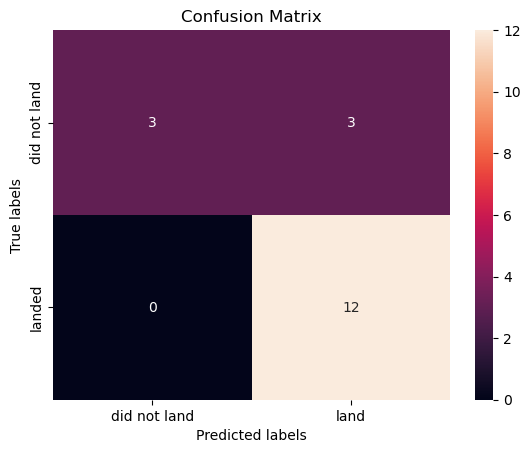

In [76]:
yhat=logreg_cv.predict(X_test_s)
plot_confusion_matrix(Y_test,yhat)

Examining the confusion matrix, we see that logistic regression can distinguish between the different classes.  We see that the problem is false positives.

Overview:

True Postive - 12 (True label is landed, Predicted label is also landed)

False Postive - 3 (True label is not landed, Predicted label is landed)


## TASK  6


Create a support vector machine object then  create a  <code>GridSearchCV</code> object  <code>svm_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [77]:
# Defining the Support Vector Machine model
svm = SVC(max_iter=2000)

# Defining the parameter grid for GridSearchCV
parameters = {'kernel': ('linear', 'rbf', 'poly', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma': np.logspace(-3, 3, 5)}

# Creating the GridSearchCV object with 10-fold cross-validation
svm_cv = GridSearchCV(svm, parameters, cv=10)

# Fitting the model to find the best parameters
svm_cv.fit(X_train_s, Y_train)

# Displaying the best parameters
print(svm_cv.best_params_)

{'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}


In [78]:
print("Tuned hyperparameters :(best parameters) ",svm_cv.best_params_)
print("Accuracy :",svm_cv.best_score_)

Tuned hyperparameters :(best parameters)  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
Accuracy : 0.8482142857142856


## TASK  7


Calculate the accuracy on the test data using the method <code>score</code>:


In [79]:
accuracy_svm = svm_cv.score(X_test_s, Y_test)

# Display the accuracy
print(f"Accuracy on test data with SVM: {accuracy_svm:.4f}")

Accuracy on test data with SVM: 0.8333


We can plot the confusion matrix


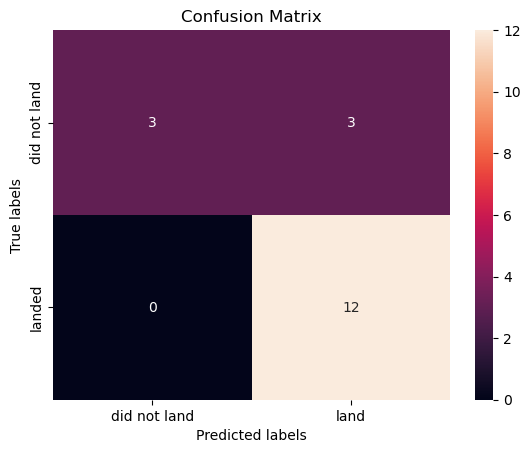

In [80]:
yhat=svm_cv.predict(X_test_s)
plot_confusion_matrix(Y_test,yhat)

## TASK  8


Create a decision tree classifier object then  create a  <code>GridSearchCV</code> object  <code>tree_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [81]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Defining the Decision Tree model
tree = DecisionTreeClassifier()

# Defining the parameter grid for GridSearchCV
parameters = {'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'max_depth': [2 * n for n in range(1, 10)],
              'max_features': ['log2', 'sqrt'],
              'min_samples_leaf': [1, 2, 4],
              'min_samples_split': [2, 5, 10]}

# Creating the GridSearchCV object with 10-fold cross-validation
tree_cv = GridSearchCV(tree, parameters, cv=10)

# Fitting the model to find the best parameters
tree_cv.fit(X_train_s, Y_train)

# Displaying the best parameters
print(tree_cv.best_params_)

{'criterion': 'entropy', 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'splitter': 'random'}


In [82]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'splitter': 'random'}
accuracy : 0.9017857142857144


## TASK  9


Calculate the accuracy of tree_cv on the test data using the method <code>score</code>:


In [83]:
accuracy_tree = tree_cv.score(X_test_s, Y_test)

# Display the accuracy
print(f"Accuracy on test data with Decision Tree: {accuracy_tree:.4f}")

Accuracy on test data with Decision Tree: 0.8333


We can plot the confusion matrix


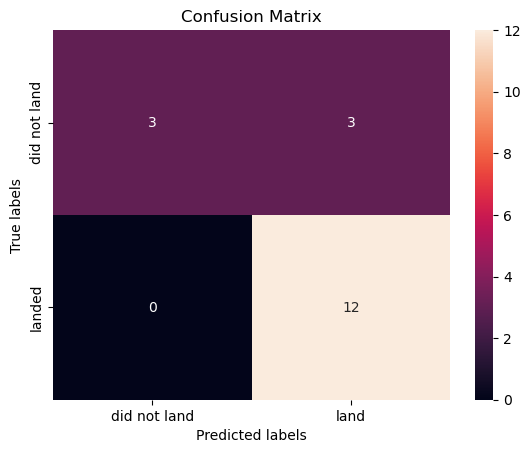

In [84]:
yhat = tree_cv.predict(X_test_s)
plot_confusion_matrix(Y_test,yhat)

## TASK  10


Create a k nearest neighbors object then  create a  <code>GridSearchCV</code> object  <code>knn_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [85]:
KNN = KNeighborsClassifier()

# Defining the parameter grid for GridSearchCV
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1, 2]}  # 'p' is the power parameter for the Minkowski distance

# Creating the GridSearchCV object with 10-fold cross-validation
knn_cv = GridSearchCV(KNN, parameters, cv=10)

# Fitting the model to find the best parameters
knn_cv.fit(X_train_s, Y_train)

# Displaying the best parameters
print(knn_cv.best_params_)

{'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}


In [86]:
print("Tuned hyperparameters :(best parameters) ",knn_cv.best_params_)
print("Accuracy :",knn_cv.best_score_)

Tuned hyperparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
Accuracy : 0.8482142857142858


## TASK  11


Calculate the accuracy of knn_cv on the test data using the method <code>score</code>:


In [87]:
accuracy_knn = knn_cv.score(X_test_s, Y_test)

# Display the accuracy
print(f"Accuracy on test data with KNN: {accuracy_knn:.4f}")

Accuracy on test data with KNN: 0.8333


We can plot the confusion matrix


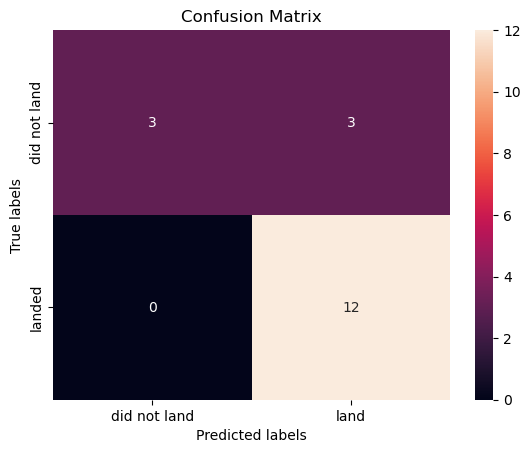

In [88]:
yhat = knn_cv.predict(X_test_s)
plot_confusion_matrix(Y_test,yhat)

## TASK  12


Find the method performs best:


In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Assuming X_train, X_test, y_train, y_test are already defined

# Train and calculate accuracies
logreg_model = LogisticRegression()
logreg_model.fit(X_train_s, Y_train)
accuracy_logreg = accuracy_score(Y_test, logreg_model.predict(X_test))

svm_model = SVC()
svm_model.fit(X_train_s, Y_train)
accuracy_svm = accuracy_score(Y_test, svm_model.predict(X_test))

tree_model = DecisionTreeClassifier()
tree_model.fit(X_train_s, Y_train)
accuracy_tree = accuracy_score(Y_test, tree_model.predict(X_test))

knn_model = KNeighborsClassifier()
knn_model.fit(X_train_s, Y_train)
accuracy_knn = accuracy_score(Y_test, knn_model.predict(X_test))

# Store accuracies in a dictionary with model names
model_accuracies = {
    'Logistic Regression': accuracy_logreg,
    'SVM': accuracy_svm,
    'Decision Tree': accuracy_tree,
    'KNN': accuracy_knn
}

# Find the best model and its accuracy
best_model_name = max(model_accuracies, key=model_accuracies.get)
best_accuracy = model_accuracies[best_model_name]

# Print the accuracies for comparison
print(f"Logistic Regression Accuracy: {accuracy_logreg:.4f}")
print(f"SVM Accuracy: {accuracy_svm:.4f}")
print(f"Decision Tree Accuracy: {accuracy_tree:.4f}")
print(f"KNN Accuracy: {accuracy_knn:.4f}")

# Print the best model and its accuracy
print(f"The best model is: {best_model_name} with an accuracy of {best_accuracy:.4f}")


Logistic Regression Accuracy: 0.6667
SVM Accuracy: 0.3333
Decision Tree Accuracy: 0.6667
KNN Accuracy: 0.6667
The best model is: Logistic Regression with an accuracy of 0.6667


In [98]:
# Store accuracies in a dictionary with model names
model_accuracies = {
    'Logistic Regression': accuracy_logreg,
    'SVM': accuracy_svm,
    'Decision Tree': accuracy_tree,
    'KNN': accuracy_knn
}

# Find the best model and its accuracy
best_model_name = max(model_accuracies, key=model_accuracies.get)
best_accuracy = model_accuracies[best_model_name]

# Print the accuracies for comparison
print(f"Logistic Regression Accuracy: {accuracy_logreg:.4f}")
print(f"SVM Accuracy: {accuracy_svm:.4f}")
print(f"Decision Tree Accuracy: {accuracy_tree:.4f}")
print(f"KNN Accuracy: {accuracy_knn:.4f}")

# Print the best model and its accuracy
print(f"The best model is: {best_model_name} with an accuracy of {best_accuracy:.4f}")

Logistic Regression Accuracy: 0.6667
SVM Accuracy: 0.3333
Decision Tree Accuracy: 0.6667
KNN Accuracy: 0.6667
The best model is: Logistic Regression with an accuracy of 0.6667


# My Validation Strategy

                 Model  Accuracy  Jaccard Score  F1 Score
0  Logistic Regression  0.833333            0.8  0.888889
1                  SVM  0.833333            0.8  0.888889
2        Decision Tree  0.833333            0.8  0.888889
3                  KNN  0.833333            0.8  0.888889
The best model based on F1 Score is: Logistic Regression
With Accuracy: 0.8333333333333334, Jaccard: 0.8, F1 Score: 0.8888888888888888


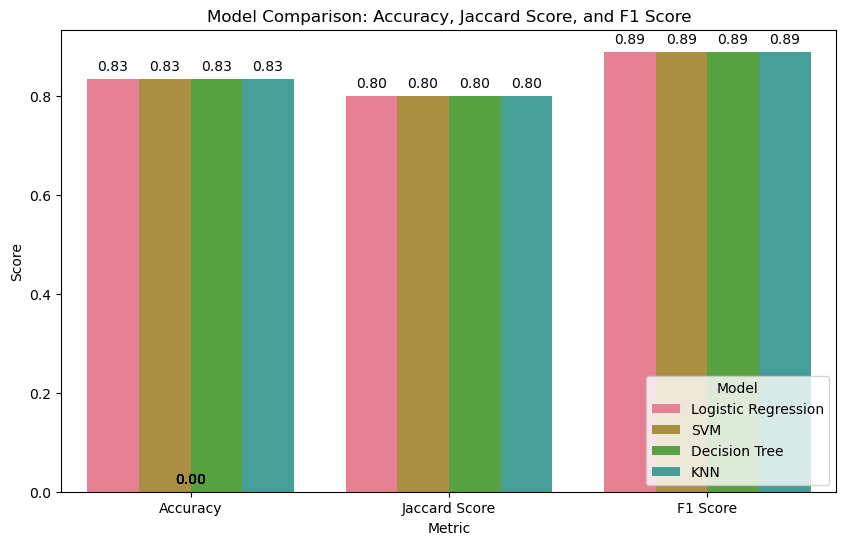

In [99]:
import pandas as pd
from sklearn.metrics import jaccard_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Function to calculate metrics for each model
def evaluate_model(model, X_test_s, Y_test):
    yhat = model.predict(X_test_s)
    accuracy = accuracy_score(Y_test, yhat)
    jaccard = jaccard_score(Y_test, yhat)
    f1 = f1_score(Y_test, yhat)
    return accuracy, jaccard, f1

# Dictionary to store model names and corresponding trained models
models = {
    'Logistic Regression': logreg_cv,
    'SVM': svm_cv,
    'Decision Tree': tree_cv,
    'KNN': knn_cv
}

# List to store the evaluation results for each model
results = []

# Loop over each model and calculate the evaluation metrics
for model_name, model in models.items():
    accuracy, jaccard, f1 = evaluate_model(model, X_test_s, Y_test)
    results.append([model_name, accuracy, jaccard, f1])

# Create a DataFrame to display the results
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Jaccard Score', 'F1 Score'])

# Display the DataFrame
print(results_df)

# Find the model with the highest F1 score
best_model = results_df.loc[results_df['F1 Score'].idxmax()]

print(f"The best model based on F1 Score is: {best_model['Model']}")
print(f"With Accuracy: {best_model['Accuracy']}, Jaccard: {best_model['Jaccard Score']}, F1 Score: {best_model['F1 Score']}")

# Create a bar plot for comparison of the models' scores
def plot_model_comparison(df):
    # Melt the DataFrame for easy plotting with Seaborn
    df_melted = pd.melt(df, id_vars=['Model'], value_vars=['Accuracy', 'Jaccard Score', 'F1 Score'], 
                        var_name='Metric', value_name='Score')
    
    plt.figure(figsize=(10, 6))
    
    # Use Seaborn to plot
    sns.set_palette("husl")  # Set a color palette
    ax = sns.barplot(x='Metric', y='Score', hue='Model', data=df_melted)
    
    # Add value labels on the bars
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 9), textcoords='offset points')
    
    # Set plot titles and labels
    plt.title('Model Comparison: Accuracy, Jaccard Score, and F1 Score')
    plt.ylabel('Score')
    plt.xlabel('Metric')
    plt.legend(title='Model')
    plt.show()

# Call the function to plot the graph
plot_model_comparison(results_df)

## Authors


[Pratiksha Verma](https://www.linkedin.com/in/pratiksha-verma-6487561b1/)


<!--## Change Log--!>


<!--| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|--!>


### <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>
